# Assessment 1
**Student Name:** Nhung Seidensticker

**Student Number:** 29395968

## Notes:
* All the works should be done in this notebook and only using R Kernel.
* Change the name of the notebook as `a1-<student_number>-<student_name>.ipynb`
* Make sure save snapshots of your notebook as you are developing it.
* Make sure you submit the latest version after you saved the latest changes.
* Please keep the outputs and plots so we can see exactly what you produced.
* Provide concise and precise comments inside the code cells and discussion in the markdown cells.
* Choose proper names for your variables and struct an easy to follow notebook (e.g. using headings and cells).
* Choose proper titles, labels, and legends for the plots.
* Provide appropriate references if applicable.
* Only submit the notebook.

## Question 1: EDA
Exploratory data analysis (EDA) is a crucial step in data analysis. In the following questions, you will use R to perform exploratory data analysis to discover attributes and relationships in one variable to multiple variables. You need to pay attention to the distribution of data, outliers, anomalies and other patterns and trends in data. In the end, you will summarise the insights you obtained from your EDA.

In [1]:
# Load libraries:
library(ggplot2)
library(gridExtra)
theme_set(theme_classic())

In [2]:
# load the data, na.strings will convernt empty strings to na. 
titanic = read.csv("a1-q1-data.csv", na.strings="")

### Data Dictionary

__Variable__:	__Definition Key__
* `survival`:	Survival	0 = No, 1 = Yes
* `pclass`:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* `sex`:	Sex	
* `Age`:	Age in years	
* `sibsp`:	# of siblings / spouses aboard the Titanic	
* `parch`:	# of parents / children aboard the Titanic	
* `ticket`:	Ticket number	
* `fare`:	Passenger fare	
* `cabin`:	Cabin number	
* `embarked`:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


__Variable__: __Notes__
* `pclass`: A proxy for socio-economic status (SES)
  * `1st` = Upper
  * `2nd` = Middle
  * `3rd` = Lower

* `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* `sibsp`: The dataset defines family relations in this way...
  * `Sibling` = brother, sister, stepbrother, stepsister
  * `Spouse` = husband, wife (mistresses and fiancés were ignored)

* `parch`: The dataset defines family relations in this way...
  * `Parent` = mother, father
  * `Child` = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.
  

## Understanding the data
1. What is the data structure
2. Where is there missing data
3. Can any entries be deleted? or can missing values be replaced?

#### 1. Check the data structure

In [3]:
#Check structure of the data
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 416 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 525 596 662 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 147 levels "A10","A14","A16",..: NA 82 NA 56 NA NA 130 NA NA NA ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


### 2. Is there missing data?

using sapply will provide a summary of what is missing. Note that it only shows numeric n/a and not factors. 

In [4]:
#use sapply to look at the file and apply the function of is.na and sum it to give a list of missing num values [1]. 
sapply(titanic, function(a) sum(is.na(a)))      

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

### Can any entries be deleted or replaced? 

As you can see from the output above, there are 177 records in Age that There is no way to replace or infer Age, however, removing the data will remove 177 valuable information on sex and class. Age is not the only thing that can be used to analyse the data. ggplot will disregard missing values when plotting age. Further, there are 687 missing values for Cabin, this will be hard to infer what the cabins can be. Pclass can be used to determine if their ticket status affected survival. 


### Part 1.A
Graphically describe the variables Survived, Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked. Explain the distribution of each variable (e.g., skewness, mean, standard deviation, proportion, etc.).

In [5]:
#Set up factors - some fields are catagorical and the structure above indicates that it has been read as numerical.
#fields will therefore need to be read as factor [2].
titanic$Survived <- as.factor(titanic$Survived)
titanic$Pclass <- as.factor(titanic$Pclass)
titanic$Sex <- as.factor(titanic$Sex)
titanic$Embarked <- as.factor(titanic$Embarked)

### Graphically representation of the dataset

As Survived, Pclass, Sex, and Embarked are categorical, barcharts will be created. Will briefly look at the distribution for Age, SibSp, Parch and Fare. 

### Bar graphs for the categorical fields

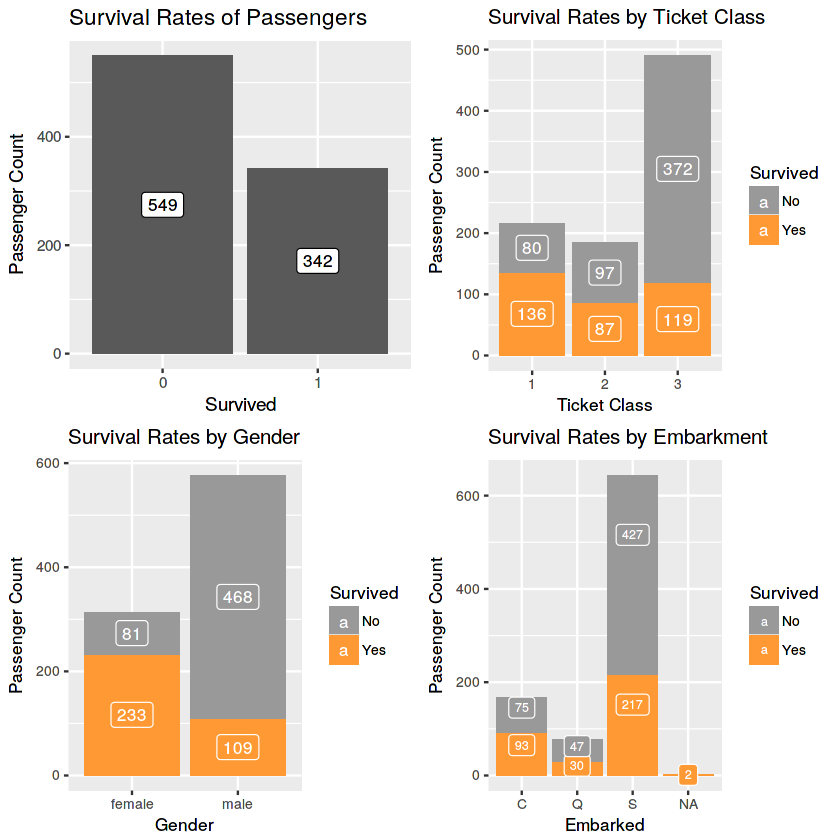

In [19]:
#create bar graph of survivers
#use ggplot to plot the dataframe titanic, have the x-axis be survived
gSurvival <- ggplot(titanic, aes(x = Survived, label = rownames(titanic))) +
#use the theme gray for the back of the plot [3]
    theme_gray() +
#create a bar graph
    geom_bar() +
#label the graph and position it in the stack, create labels and title for the graph
    geom_label (stat = 'count', aes(label = ..count..), position = position_stack(vjust = 0.5), color = "black", size = 3.5) +
    labs(y = "Passenger Count", title = "Survival Rates of Passengers")
#create bar graph of survivors by ticket class
#use ggplot to plot the dataframe titanic, have the x-axis be Pclass and fill the bar with survived
gClass <- ggplot(titanic, aes(x = Pclass, fill = Survived)) +
    theme_gray() +
    geom_bar() +
    geom_label (stat = 'count', aes(label = ..count..), position = position_stack(vjust = 0.5), color = "white", size = 3.5) +
    theme(text = element_text(size=10, family="Segoe UI Semibold")) +
    #change the fill colours to something more pleasing to the eye and cange the legend label to be more readable other than
    # 0 and 1. 
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    #create labels for the graph and add a title. 
    labs(y = "Passenger Count", x = "Ticket Class", title = "Survival Rates by Ticket Class")
#create bar graph of survivors by gender
#similar code logic from up top. 
gGender <- ggplot(titanic, aes(x = Sex, fill = Survived)) +
    theme_gray() +
    geom_bar() +
    geom_label (stat = 'count', aes(label = ..count..), position = position_stack(vjust = 0.5), color = "white", size = 3.5) +
    theme(text = element_text(size=10, family="Segoe UI Semibold")) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x= "Gender", title = "Survival Rates by Gender")
#create bar graph of survivors by embarkment
gEmbarkment <- ggplot(titanic, aes(x = Embarked, fill = Survived)) +
    theme_gray() +
    geom_bar() +
    geom_label (stat = 'count', aes(label = ..count..), position = position_stack(vjust = 0.7), color = "white", size = 2.5) +
    theme(text = element_text(size=10, family="Segoe UI Semibold")) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x= "Embarked", title = "Survival Rates by Embarkment")

    #arrange all the graphs into a single grid
    grid.arrange(gSurvival, gClass, gGender, gEmbarkment, nrow = 2)

### Interpretation of the graphs for the categorical fields

As seen in the bar graphs above, more than half the passengers survived with more Females than Males surviving. Passengers in first class were likely to survived compared to 2nd and 3rd class. More than half of the passengers in 2nd and 3rd class perished compared to 1st class where more than half survived.  

It is evident that the survival rate for males was less regardless of class. It is hard to determine if embarkment made a differenct on survival, however using count doesn't provide a clear picture, percentage should be used instead. 

### Distribution graphs for the numeric fields

From the graphs below, the distribution of sibling, parents, and fare are scewed to the left. Age has a more normalised distribution. 

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

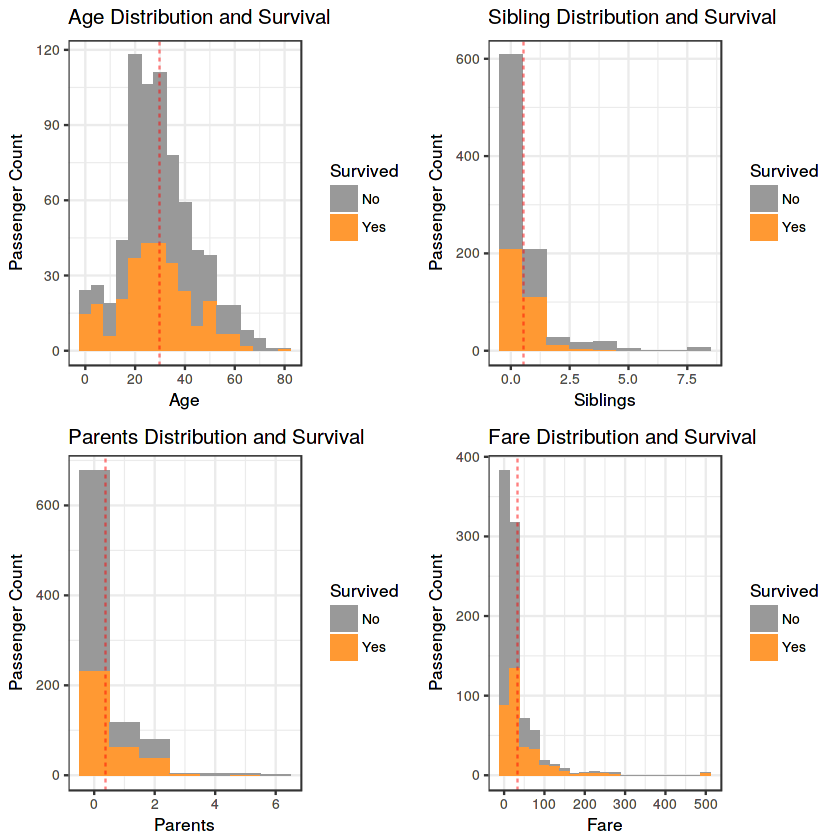

In [7]:
#create distribution graphs for the following fields: SibSp, Parch, Fare
gAge <- ggplot(titanic, aes(x = Age, fill = Survived)) +
    theme_bw() + 
    geom_histogram(binwidth = 5) + 
    geom_vline(aes(xintercept=mean(Age, na.rm=T)),   # Ignore NA values for mean
               color="red", alpha = 0.5, linetype="dashed", size=0.5) +
    theme(text = element_text(size=10, family="Segoe UI Semibold")) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x = "Age", title = "Age Distribution and Survival")

gSiblings <-ggplot(titanic, aes(x = SibSp, fill = Survived)) +
    theme_bw() + 
    geom_histogram(binwidth = 1) + 
    geom_vline(aes(xintercept=mean(SibSp, na.rm=T)),   # Ignore na values for mean
               color="red", alpha = 0.5, linetype="dashed", size=0.5) +
    theme(text = element_text(size=10, family="Segoe UI Semibold")) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x = "Siblings", title = "Sibling Distribution and Survival")

gParents <-ggplot(titanic, aes(x = Parch, fill = Survived)) +
    theme_bw() + 
    geom_histogram(binwidth = 1) + 
    geom_vline(aes(xintercept=mean(Parch, na.rm=T)),   # Ignore na values for mean
               color="red", alpha = 0.5,  linetype="dashed", size=0.5) +
    theme(text = element_text(size=10, family="Segoe UI Semibold")) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x = "Parents", title = "Parents Distribution and Survival")

gFare <-ggplot(titanic, aes(x = Fare, fill = Survived)) +
    theme_bw() + 
    geom_histogram(binwidth = 25) + 
    geom_vline(aes(xintercept=mean(Fare, na.rm=T)),   # Ignore na values for mean
               color="red", alpha = 0.5, linetype="dashed", size=0.5) +
    theme(text = element_text(size=10, family="Segoe UI Semibold")) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x = "Fare", title = "Fare Distribution and Survival")



    #arrange all the graphs into a single grid
    grid.arrange(gAge, gSiblings, gParents, gFare, nrow = 2)

### Interpretation of the histograms for the numeric fields

As seen in the bar graphs above, more than half the passengers survived with more Females than Males surviving. Passengers in first class were likely to survived compared to 2nd and 3rd class. More than half of the passengers in 2nd and 3rd class perished compared to 1st class where more than half survived.  

It is evident that the survival rate for males was less regardless of class. It is hard to determine if embarkment made a differenct on survival, however using count doesn't provide a clear picture, percentage should be used instead. 

## Boxplot Visualisation 

Warning message:
“Removed 177 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 177 rows containing non-finite values (stat_summary).”Warning message:
“Removed 177 rows containing missing values (geom_point).”Warning message:
“Removed 177 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 177 rows containing non-finite values (stat_summary).”Warning message:
“Removed 177 rows containing missing values (geom_point).”

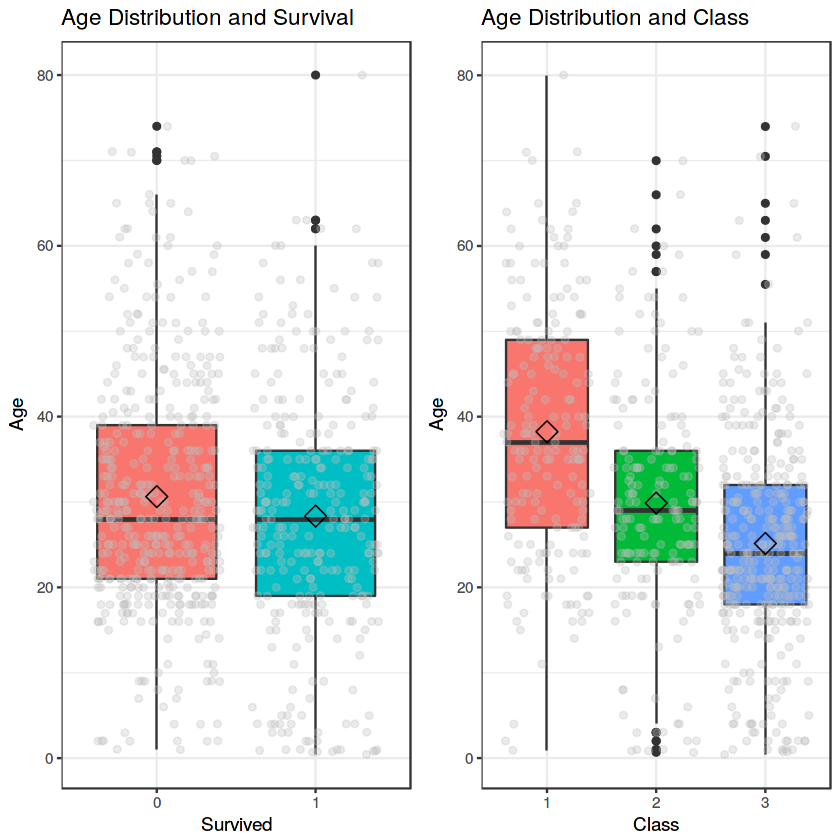

In [8]:
#boxplot of age and survival
bAgeSurvival <- ggplot(titanic, aes(x = Survived, y = Age, fill = Survived)) +
    guides(fill=FALSE) +
    theme_bw() + 
    geom_boxplot() +
#jitter overlays the data so you can see the spread
    geom_jitter(alpha = 0.3, color = "grey") +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
    labs(y = "Age", x = "Survived", title = "Age Distribution and Survival")

#boxplot of age and class
bAgeClass <- ggplot(titanic, aes(x = Pclass, y = Age, fill = Pclass)) +
    guides(fill = FALSE) +
    theme_bw() + 
    geom_boxplot() + 
#jitter overlays the data so you can see the spread
    geom_jitter(alpha = 0.3, color = "grey") +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
    labs(y = "Age", x = "Class", title = "Age Distribution and Class")

    #arrange all the graphs into a single grid
    grid.arrange(bAgeSurvival, bAgeClass, nrow = 1)

### Box plot interpretation.

From the box plots above, the age that passengers survived or didn't is around 20 - 40 years. 

Looking at the box plot of class and age it can be seen there were younger passengers in ticket class 3. 

### Part 1.B 
It is believed that passengers from 1st class have a better chance to survive than from 3rd class. Using available data, can you support or reject this claim? You need to prepare related summaries and graphs to support your answer.

### Graphs combining data

The following graphs have been created to infer if there passengers from 1st class had a better chance of survival than 3rd. 

### 1. Look at the survival rate by ticket class

In the graph and summary table below, it can be inferred that having a first class ticket improved survival rates . For class 1 the percentage of survival was 63% compared to class 3 where it was 24%. 

In [9]:
#create table of just survival
survivedClass = table(titanic$Survived, titanic$Pclass)
#add sums to the table
addmargins(survivedClass)
#create table with class and survival by percentage
percSurvival = round(100*prop.table(survivedClass,2), digits=0)

,1,2,3,Sum
0,80,97,372,549
1,136,87,119,342
Sum,216,184,491,891


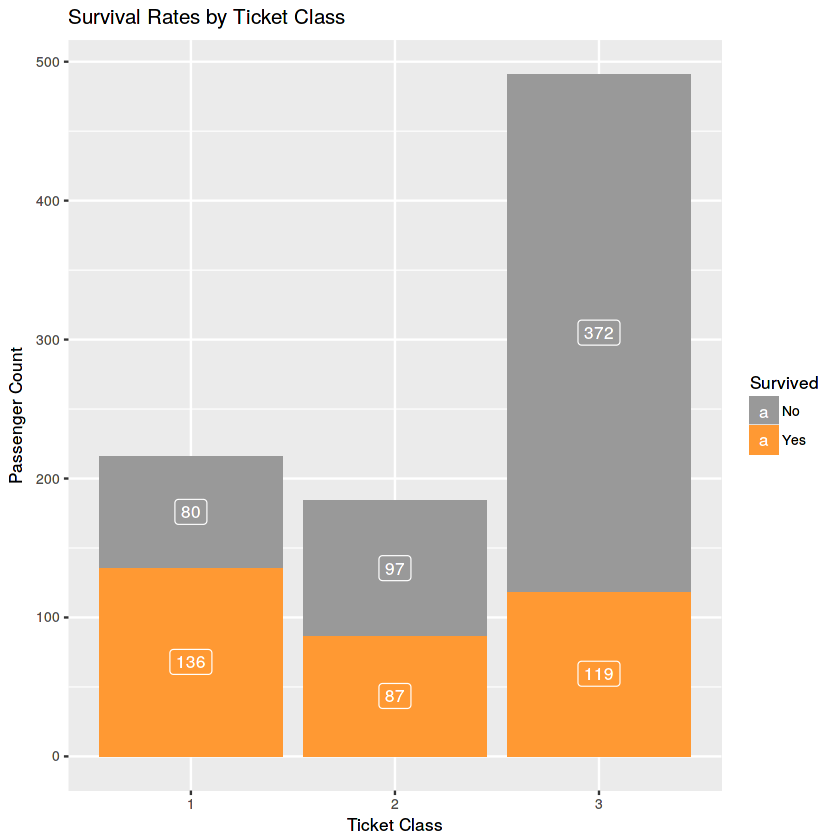

In [20]:
#plot of survival by ticket class
ggplot(titanic, aes(x = Pclass, fill = Survived)) +
    theme_gray() +
#create the bar graph
    geom_bar() +
#Add elements to the graph
    geom_label (stat = 'count', aes(label = ..count..), position = position_stack(vjust = 0.5), color = "white", size = 3.5) +
    theme(text = element_text(size=10, family="Segoe UI Semibold")) +
    #change the fill colours to something more pleasing to the eye and cange the legend label to be more readable other than
    # 0 and 1. 
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    #create labels for the graph and add a title. 
    labs(y = "Passenger Count", x = "Ticket Class", title = "Survival Rates by Ticket Class")



### Further analysis for survival rates

For interest, it's interesting to look at survival rates based on age, gender and ticket class. The below graphs provides a summary of this. From the graphs, it could be inferred that:
* women and children had a better chance of surviving regardless of what class they were in,
* females between ages 10-20 in Class 3 did not have a good survival rate. 
* Males in first class across age groups had a higher survival rate than males in second and third class.  

It could be inferred that "women and children first" was applied when departing the sinking titanic. 

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

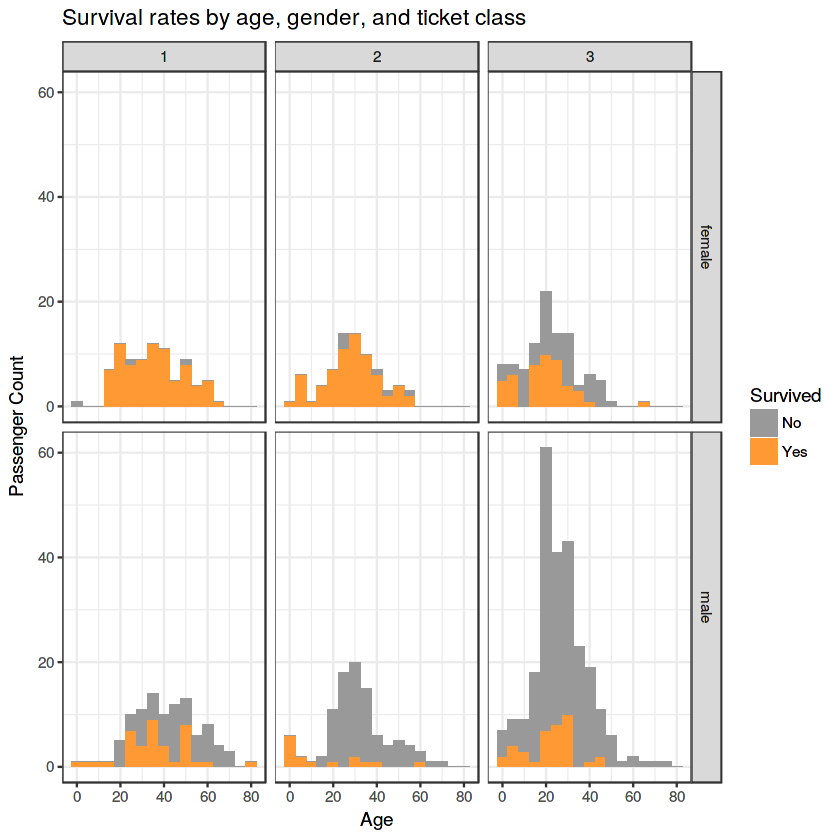

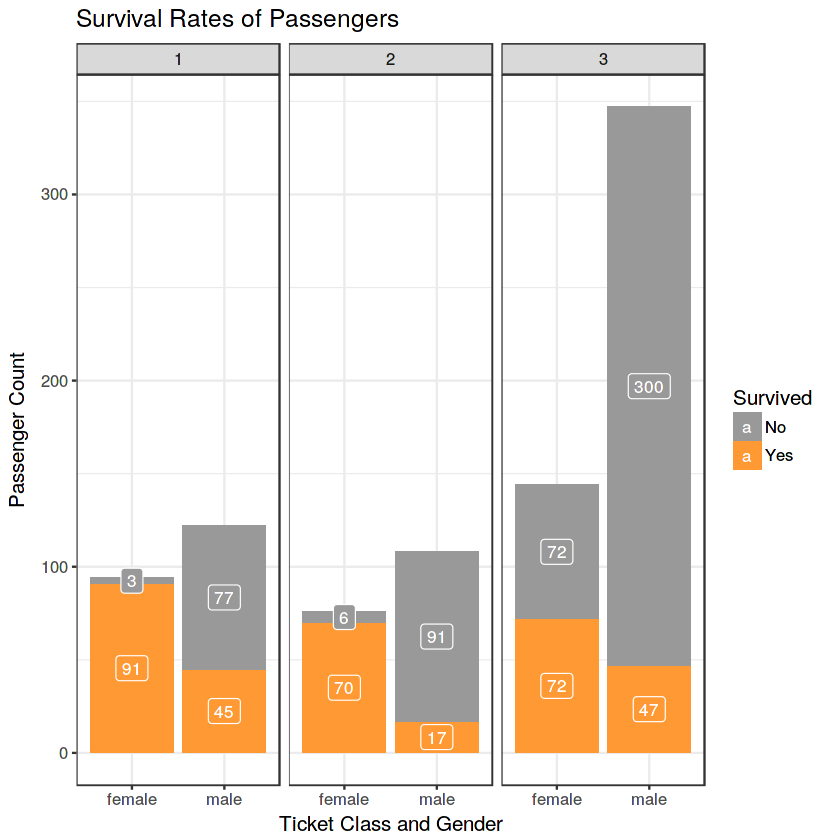

In [11]:
#create histogram of survival by ticket class, gender and age. 
ggplot(titanic, aes(x = Age, fill = Survived)) +
    theme_bw() + 
    facet_grid(Sex ~ Pclass) +
    geom_histogram(binwidth = 5) + 
    labs(y = "Passenger Count", x = "Age", title = "Survival rates by age, gender, and ticket class") +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) 
#create bar graph of gender, survival, and ticket class 
ggplot(titanic, aes(x = Sex, fill = Survived)) +
    theme_bw() +
    facet_wrap(~Pclass) +
    geom_bar() +
    geom_label (stat = 'count', aes(label = ..count..), position = position_stack(vjust = 0.5), color = "white", size = 3.5) +
    theme(text = element_text(size=12, family="Segoe UI Semibold")) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x = "Ticket Class and Gender", title = "Survival Rates of Passengers")

### Part 1.3
Create a new variable called `Fsize` that reflects the family size of those passengers traveling with their families. To find the family size, you need to add the number of siblings, the number of parents and the person him/herself. 

Draw a histogram showing the relationship between the number of survivors for each family size.

In [12]:
#create family size
Fsize = titanic$SibSp + titanic$Parch + 1

### Interpretation

From the graph it could be inferred that smaller family sizes of 2 to 4 had a better chance of surviving compared to individual or family size that were greater than 4. 

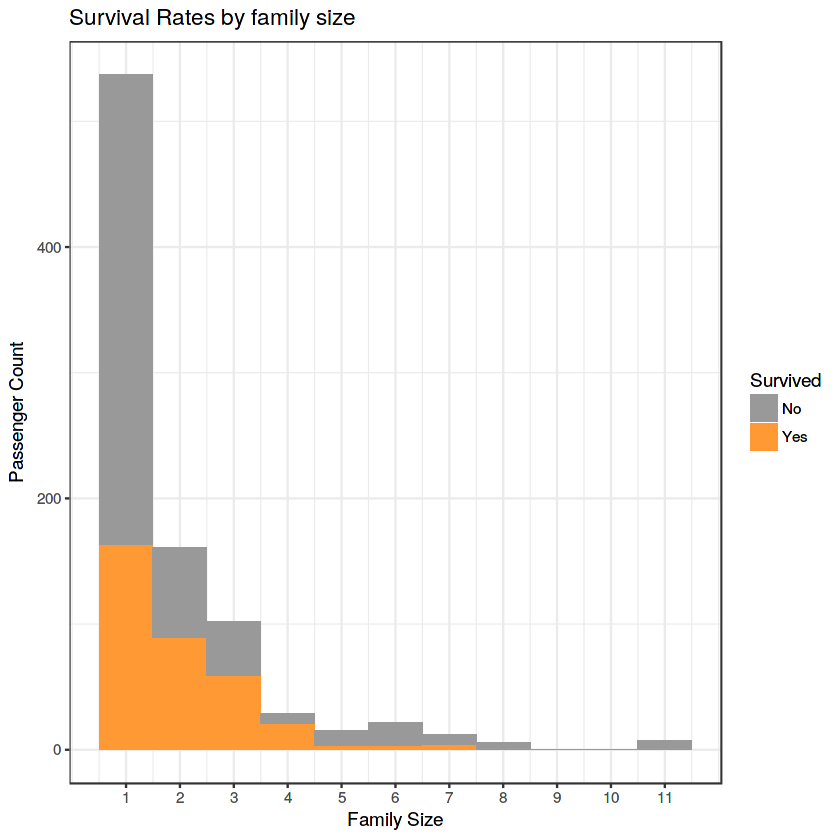

In [13]:
#Create plot of survival rate by family size
ggplot(titanic, aes(x = Fsize, fill = Survived)) +
    theme_bw() +
    geom_histogram(binwidth = 1) +
    scale_x_continuous(breaks = c(1:11)) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x = "Family Size", title = "Survival Rates by family size")

### Further analysis

It's interesting to look at family size, ticket class, and gender to determine if the these factors influenced the survival rates. From the graph below, it appears that females regardless of family size had a higher rate of survival compared to males.  


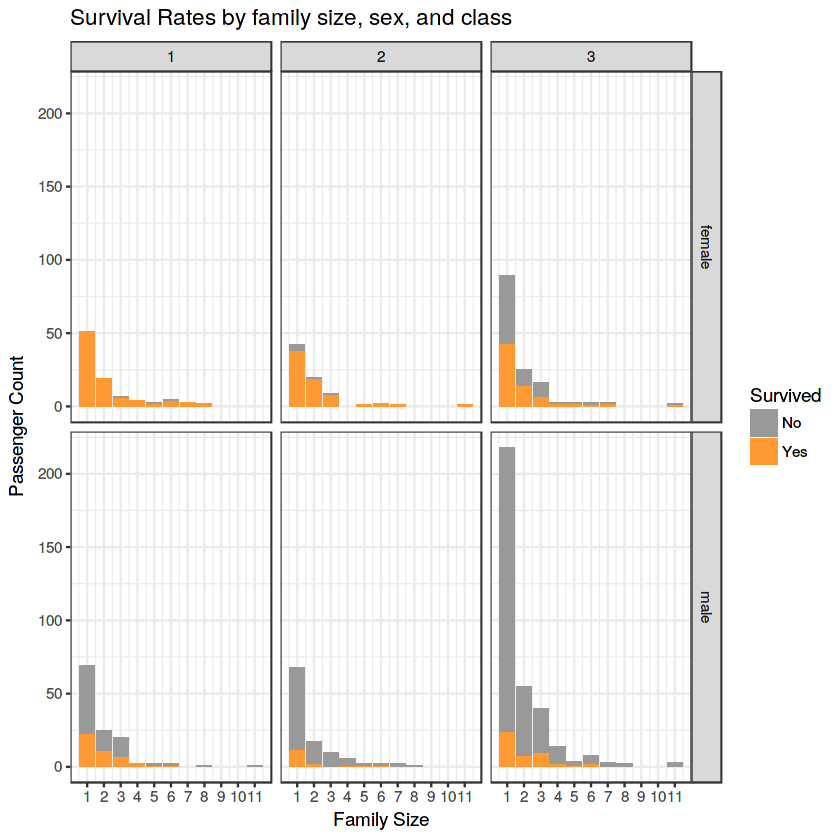

In [14]:
#create plot that contains Class, Gender, Family Size
ggplot(titanic, aes(x = Fsize, fill = Survived)) +
    theme_bw() +
    geom_bar() +
    facet_grid(Sex ~ Pclass) +
    scale_x_continuous(breaks = c(1:11)) +
    scale_fill_manual(values=c("#999999", "#FF9933"),
                        breaks = c("0", "1"),
                       labels = c("No", "Yes")) +
    labs(y = "Passenger Count", x = "Family Size", title = "Survival Rates by family size, sex, and class")

# Question 2 Bayes' Theorem
In this question, you will apply Bayes' Theorem to calculate the probability that a patient has lung cancer given the chest x-ray result is positive. The probabilities are estimated from a synthetic dataset, hence do not represent the actual probabilities. 

Please define all the variables you use. A few examples are given.

### Part 2.1
Assuming the probability of having lung cancer is $3.05\%$. If a patient has lung cancer, the chest x-ray test has $98\%$ chance of getting a positive result. On the other hand, if a patient does not have lung cancer, the x-ray has $9\%$ chance of showing a positive result. What is the probability that a patient has lung cancer given that the x-ray result is positive? 

In [15]:
# the probability of having lung cancer is  3.05% (c1 -> having cancer)
p_c1 = 0.0305
...
# What is the probability that a patient has lung cancer given that the x-ray result is positive?
## x1 -> positive x-ray
p_c1_x1 = 0.2552

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


### Part 2.1 - Working

Baye's Theorem 

$$P(A|B) = \frac{P(B|A)P(A)}{P|B} = \frac{P(B|A)P(A)}{P(A)P(B|A)+P(\overline{A})P(B|\overline{A})} $$

1. P(A|B) = probability of having the disease and testing positive = unknown
2. P(B|A) = probability of testing positive and having the disease = 0.98 (98%)
3. P(A) = probability of the likelihood of having the disease regardless of result = 0.0305 (3.05%)
4. P($\overline{A}$) = probability of not having the disease = 0.9695 (96.95%)
5. P(B|$\overline{A}$) = probabilty of not having the disease but testing positive = 0.09 (9%)

$$P(A|B) = \frac{0.98\times0.0305}{(0.0305\times0.98)+(0.969\times0.09)}$$
$$P(A|B) = \frac{0.02989}{(0.02989+0.054055)}$$
$$P(A|B) = \frac{0.02989}{(0.117145)}$$
$$P(A|B) = 0.25515$$

**The probability that a patient has lung cancer given that the x-ray result is positive is 25.5%**

### Part 2.2
If a person lives in a polluted environment, there is a higher chance $9\%$ of getting lung cancer. This is known to be $4.5$ times higher than living in a non-polluted environment. Assuming the probabilities of having positive x-ray result with and without lung cancer are the same as Part (2.1), and there is a $15\%$ chance that a person lives in a polluted environment. What is the probability that a patient lives in a polluted area given that the x-ray result is positive

### Part 2.2 Working

Baye's Theorem 

$$P(A_1|B) = \frac{P(A_1B)}{P(B)} = \frac{P(A_1)P(B|A)+P(\overline{A_1})P(B|\overline{A})}{P(B)}$$

P(B|A) = 0.98 (98%), probability of testing positive and having the disease

P(B|$\overline{A}$) = .09 (9%), probability of testing positive and not having the disease 

P($A_1$) = 0.15x0.09 = 0.0135 (1.35%), probability of living in polluted environment and having disease

P($\overline{A_1}$) = 0.15 - 0.0135 = 0.1365 (13.65%), probablity of living in polluted environment and not having the disease

P(B) = 0.117145 (11.71%) from question 2.1, probability of testing positive irrespective of having cancer

Put the following values into the theorem above

$$P(A_1|B) = \frac{(0.0135\times0.98)+(0.1365\times0.09)}{0.117145}$$

$$P(A_1|B) = 0.2178$$

**The probability that a patient's x-ray result is positive is and lives in a polluted environment is 21.78%**

In [ ]:
# there is a 15% chance that a person lives in a polluted enviroment (p1 -> living in polluted area)
p_p1 = 0.15
...
p_c1_x1 = 0.03181

## Comment

## Citation

[1] DataCamp.(2016). Tutorial on the R Apply Family. Retrieved from https://www.datacamp.com/community/tutorials/r-tutorial-apply-family#codesapplycode

[2] Chang, W.,(2012).*R Graphics Cookbook*. Retrieved from http://www.cookbook-r.com/Manipulating_data/Recoding_data/

[3] Wickham, H., Chang, W., Henry, L., Pedersen, T., Takahashi, K., Wilke, C., and Woo, K.(2018).Complete themes. Retrieved from https://ggplot2.tidyverse.org/reference/ggtheme.html